In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from heatlib_var import *
import pandas as pd

In [3]:
df = pd.read_excel('klementinium.xlsx')

In [4]:
df.head()

,rok,měsíc,den,T-AVG,TMA,TMI,SRA,Flag
0,1775,1,1,-7.0,-4.8,-10.1,NaN,NaN
1,1775,1,2,-2.2,-1.4,-5.8,NaN,NaN
2,1775,1,3,-1.0,0.6,-2.2,NaN,NaN
3,1775,1,4,0.1,2.5,-3.6,NaN,NaN
4,1775,1,5,2.2,3.0,1.6,NaN,NaN


In [5]:
df.tail()

,rok,měsíc,den,T-AVG,TMA,TMI,SRA,Flag
88384,2016,12,27,6.1,7.2,3.8,0.4,NaN
88385,2016,12,28,5.1,7.1,4.4,14.7,NaN
88386,2016,12,29,0.2,4.5,-0.7,0.0,NaN
88387,2016,12,30,-1.2,0.5,-2.4,0.0,T
88388,2016,12,31,-2.4,0.5,-3.7,0.0,T


In [6]:
surfT = df['T-AVG'].mean()

In [7]:
# reseni s konstatni konduktivitou pro celou kuru
N = 14001
m = dict(n=N, k=2.5*np.ones(N-1), H=1e-6*np.ones(N-1),
         tc=35000, T0=surfT, q=-0.02)
init(m)

In [8]:
# vypocet hustoty tepelneho toku v hloubce 30m
ix = abs(m['x'] - 30).argmin()
qix = -(m['k'][ix-1] + m['k'][ix])/2 * (m['t'][ix+1] - m['t'][ix - 1])/2/m['dx']
ntc = m['x'][ix]

In [9]:
# reseni s konstatni konduktivitou
N = 3001
m = dict(n=N, k=2.5*np.ones(N-1), H=1e-6*np.ones(N-1),
         rho=2700*np.ones(N-1), c=800*np.ones(N-1),
         tc=ntc, T0=surfT, q=qix)
init(m)

In [10]:
dt = 24*60*60
for T in df['T-AVG']:
    m['T0'] = T
    btcs(m, dt)

(30.0, 0)

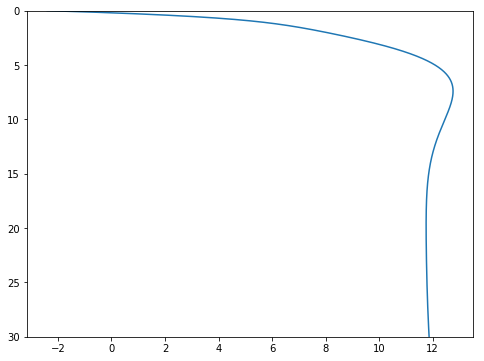

In [11]:
# plot result
plot(m['t'], m['x'])
ylim(m['tc'], 0)